In [1]:
import os
import pandas as pd
import numpy as np
from dynaconf import Dynaconf
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

from elqm.utils import get_dir

In [2]:
RESULTS_NAME = [
    "manual_qa_pairs",
    "gpt4_collection",
    "self_100",
][0]

ANALYZE_ANSWER = True

# Only set to true if the chunks/sources of the dataset and the config match, i.e. if the oracle dataset has been auto-generated.
# In general, this is False
ANALYZE_RETRIEVER = "self" in RESULTS_NAME

In [3]:
config_results = {}
config_paths = {}

for root, dirs, files in os.walk(get_dir("configs")):
    for file in files:
        if file.endswith(".yaml"):
            config_path = os.path.join(root, file)
            config_paths[file] = config_path

            config = Dynaconf(settings_files=config_path)
            if config.evaluate:
                results_file = os.path.join(get_dir("results", RESULTS_NAME), file.replace(".yaml", ".csv"))
                if os.path.exists(results_file):
                    config_results[file] = pd.read_csv(results_file)
                else:
                    config_results[file] = None

# Sort the dicts alphabetically
config_paths = dict(sorted(config_paths.items()))
config_results = dict(sorted(config_results.items()))

for k, v in config_results.items():
    print("✅" if v is not None else "🔲", k)

config_results = {k: v for k, v in config_results.items() if v is not None}

✅ 1024_10_nlc_bge.yaml
✅ 1024_1_nlc_bge.yaml
✅ 1024_5_nlc_bge.yaml
✅ 256_10_10_nlc_bge_fn_mistral.yaml
✅ 256_10_bge.yaml
✅ 256_10_g4a.yaml
✅ 256_10_nlc_bge.yaml
✅ 256_10_nlc_bge_fn.yaml
✅ 256_10_nlc_bge_fn_enrich.yaml
✅ 256_10_nlc_bge_fn_gemma.yaml
✅ 256_10_nlc_bge_fn_mistral.yaml
✅ 256_10_nlc_bge_fn_mistral_enrich.yaml
✅ 256_10_nlc_bge_fn_mixtral.yaml
✅ 256_10_nlc_bge_fn_orca2.yaml
✅ 256_10_nlc_bge_mistral.yaml
✅ 256_10_nlc_g4a.yaml
✅ 256_10_nlc_g4a_fn.yaml
✅ 256_1_nlc_bge.yaml
✅ 256_20_g4a_nomodel.yaml
✅ 256_5_5_nlc_bge_fn.yaml
✅ 256_5_5_nlc_bge_fn_mistral_h1.yaml
✅ 256_5_5_nlc_bge_fn_mistral_h2.yaml
✅ 256_5_5_nlc_bge_fn_mistral_hc1.yaml
✅ 256_5_5_nlc_bge_fn_mistral_hc2.yaml
✅ 256_5_5_nlc_bge_fn_mistral_hc3.yaml
✅ 256_5_5_nlc_bge_fn_mistral_s1.yaml
✅ 256_5_5_nlc_bge_fn_mistral_s2.yaml
✅ 256_5_5_nlc_bge_mistral.yaml
✅ 256_5_nlc_bge.yaml
✅ 256_bm_10_nlc_bge_fn_mistral.yaml
✅ 512_10_nlc_bge.yaml
✅ 512_1_nlc_bge.yaml
✅ 512_5_nlc_bge.yaml
✅ sem_40_nlc_bge_fn.yaml
✅ sem_40_nlc_bge_fn_mistr

In [4]:
for k, v in config_results.items():
    config_results[k]['A_BERT_RAG_DELTA_F1'] = config_results[k]['A_BERT_RAG_F1'] - config_results[k]['A_BERT_F1']

In [5]:
mean_results = {k: v.mean() for k, v in config_results.items()}

In [6]:
mean_results_df = pd.DataFrame(mean_results)

In [7]:
', '.join(list(mean_results_df.index))

'A_AR_F1, A_AR_PR, A_AR_RC, A_BERT_F1, A_BERT_PR, A_BERT_RAG_DELTA_F1, A_BERT_RAG_F1, A_BERT_RAG_PR, A_BERT_RAG_RC, A_BERT_RC, A_BL_BL, A_BL_BREV, A_BL_LEN, A_BL_LR, A_BL_PR, A_BL_REF_LEN, A_RG1, A_RG2, A_RGL, A_RGL_SUM, RET_AP_1, RET_AP_10, RET_AP_11, RET_AP_12, RET_AP_13, RET_AP_14, RET_AP_15, RET_AP_16, RET_AP_17, RET_AP_18, RET_AP_19, RET_AP_2, RET_AP_20, RET_AP_3, RET_AP_4, RET_AP_5, RET_AP_6, RET_AP_7, RET_AP_8, RET_AP_9, RET_CG, RET_DCG, RET_F1_1, RET_F1_10, RET_F1_11, RET_F1_12, RET_F1_13, RET_F1_14, RET_F1_15, RET_F1_16, RET_F1_17, RET_F1_18, RET_F1_19, RET_F1_2, RET_F1_20, RET_F1_3, RET_F1_4, RET_F1_5, RET_F1_6, RET_F1_7, RET_F1_8, RET_F1_9, RET_NDCG, RET_PR_1, RET_PR_10, RET_PR_11, RET_PR_12, RET_PR_13, RET_PR_14, RET_PR_15, RET_PR_16, RET_PR_17, RET_PR_18, RET_PR_19, RET_PR_2, RET_PR_20, RET_PR_3, RET_PR_4, RET_PR_5, RET_PR_6, RET_PR_7, RET_PR_8, RET_PR_9, RET_RC_1, RET_RC_10, RET_RC_11, RET_RC_12, RET_RC_13, RET_RC_14, RET_RC_15, RET_RC_16, RET_RC_17, RET_RC_18, RET_RC_19,

In [8]:
metrics_selection = ['A_BERT_RAG_F1', 'A_BERT_RAG_DELTA_F1', 'A_BERT_F1', 'A_AR_F1', 'A_BL_BL', 'A_RGL_SUM', 'RET_AP_1', 'RET_AP_5', 'RET_AP_10', 'RET_RC_1', 'RET_RC_5', 'RET_RC_10', 'RET_RR', 'RET_NDCG']
reduced_mean_results_df = mean_results_df.loc[metrics_selection].T

In [9]:
if not ANALYZE_ANSWER:
    # Remove every column that starts with an "A_"
    reduced_mean_results_df = reduced_mean_results_df[reduced_mean_results_df.columns.drop(list(reduced_mean_results_df.filter(regex='A_')))]

if not ANALYZE_RETRIEVER:
    # Remove every column that starts with an "RET_"
    reduced_mean_results_df = reduced_mean_results_df[reduced_mean_results_df.columns.drop(list(reduced_mean_results_df.filter(regex='RET_')))]

In [10]:
# Remove the 256_20_g4a_nomodel.yaml row
reduced_mean_results_df = reduced_mean_results_df.drop('256_20_g4a_nomodel.yaml', errors='ignore')

In [11]:
imputed_reduced_mean_results_df = pd.DataFrame(SimpleImputer(missing_values=np.nan, strategy='mean').fit(reduced_mean_results_df).transform(reduced_mean_results_df), columns=reduced_mean_results_df.columns, index=reduced_mean_results_df.index)

In [12]:
# Estimate the best config by a weighted sum of the metrics
sorted_config_names_direct = imputed_reduced_mean_results_df.fillna(0).mean(axis=1).sort_values(ascending=False).index
imputed_reduced_mean_results_df.fillna(0).mean(axis=1).sort_values(ascending=False).round(3)

256_10_nlc_bge_fn_mixtral.yaml           0.516
256_5_5_nlc_bge_mistral.yaml             0.513
256_10_nlc_bge_fn_mistral.yaml           0.504
256_5_5_nlc_bge_fn_mistral_h2.yaml       0.502
256_10_nlc_bge_mistral.yaml              0.485
256_5_5_nlc_bge_fn_mistral_s1.yaml       0.483
256_10_nlc_bge_fn_mistral_enrich.yaml    0.481
256_5_5_nlc_bge_fn_mistral_s2.yaml       0.480
256_10_nlc_bge_fn_enrich.yaml            0.480
256_5_5_nlc_bge_fn_mistral_h1.yaml       0.479
256_5_nlc_bge.yaml                       0.475
256_5_5_nlc_bge_fn_mistral_hc3.yaml      0.475
256_1_nlc_bge.yaml                       0.473
512_1_nlc_bge.yaml                       0.472
1024_1_nlc_bge.yaml                      0.463
256_10_nlc_bge_fn_orca2.yaml             0.463
256_10_g4a.yaml                          0.460
256_5_5_nlc_bge_fn_mistral_hc2.yaml      0.457
256_10_nlc_g4a_fn.yaml                   0.456
256_10_bge.yaml                          0.453
512_5_nlc_bge.yaml                       0.452
256_10_nlc_g4

In [13]:
# Estimate the best config by a weighted sum of the deviations of the values from the mean (in standard deviations)
imputed_reduced_mean_results_df_mean = imputed_reduced_mean_results_df.mean()
imputed_reduced_mean_results_df_std = imputed_reduced_mean_results_df.std()
imputed_reduced_mean_results_df_deviation = (imputed_reduced_mean_results_df - imputed_reduced_mean_results_df_mean) / imputed_reduced_mean_results_df_std

sorted_config_names_deviation = imputed_reduced_mean_results_df_deviation.sum(axis=1).sort_values(ascending=False).index
imputed_reduced_mean_results_df_deviation.sum(axis=1).sort_values(ascending=False).round(3)

256_10_nlc_bge_fn_mixtral.yaml           9.631
256_5_5_nlc_bge_mistral.yaml             7.613
256_10_nlc_bge_fn_mistral.yaml           7.381
256_5_5_nlc_bge_fn_mistral_h2.yaml       6.511
256_5_5_nlc_bge_fn_mistral_s2.yaml       4.446
256_10_nlc_bge_mistral.yaml              3.477
256_5_5_nlc_bge_fn_mistral_h1.yaml       2.797
256_10_nlc_bge_fn_mistral_enrich.yaml    2.434
256_10_nlc_bge_fn_enrich.yaml            2.407
256_5_5_nlc_bge_fn_mistral_hc3.yaml      2.382
256_1_nlc_bge.yaml                       2.065
256_5_5_nlc_bge_fn_mistral_s1.yaml       1.830
256_5_nlc_bge.yaml                       1.571
512_1_nlc_bge.yaml                       1.526
1024_1_nlc_bge.yaml                      0.029
256_10_g4a.yaml                         -0.186
256_5_5_nlc_bge_fn_mistral_hc2.yaml     -0.511
256_10_nlc_bge_fn_gemma.yaml            -1.035
256_10_bge.yaml                         -1.069
256_10_nlc_g4a_fn.yaml                  -1.119
512_5_nlc_bge.yaml                      -1.761
256_10_nlc_g4

In [14]:
# Sort the reduced_mean_results_df by the best config
reduced_mean_results_df = reduced_mean_results_df.loc[sorted_config_names_deviation]
imputed_reduced_mean_results_df_deviation = imputed_reduced_mean_results_df_deviation.loc[sorted_config_names_deviation]
imputed_reduced_mean_results_df_deviation[reduced_mean_results_df.isna()] = np.nan  # Do not show the deviation for the missing values

In [15]:
print(reduced_mean_results_df.loc[sorted_config_names_deviation].round(3).to_markdown())
# reduced_mean_results_df.loc[sorted_config_names_deviation].round(3)

|                                       |   A_BERT_RAG_F1 |   A_BERT_RAG_DELTA_F1 |   A_BERT_F1 |   A_AR_F1 |   A_BL_BL |   A_RGL_SUM |
|:--------------------------------------|----------------:|----------------------:|------------:|----------:|----------:|------------:|
| 256_10_nlc_bge_fn_mixtral.yaml        |           0.872 |                 0.031 |       0.841 |     0.9   |     0.102 |       0.351 |
| 256_5_5_nlc_bge_mistral.yaml          |           0.858 |                 0.033 |       0.825 |     0.906 |     0.135 |       0.322 |
| 256_10_nlc_bge_fn_mistral.yaml        |           0.87  |                 0.042 |       0.828 |     0.904 |     0.083 |       0.299 |
| 256_5_5_nlc_bge_fn_mistral_h2.yaml    |           0.856 |                 0.014 |       0.842 |     0.934 |     0.076 |       0.287 |
| 256_5_5_nlc_bge_fn_mistral_s2.yaml    |           0.857 |                 0.016 |       0.84  |     0.905 |     0.042 |       0.22  |
| 256_10_nlc_bge_mistral.yaml           |       

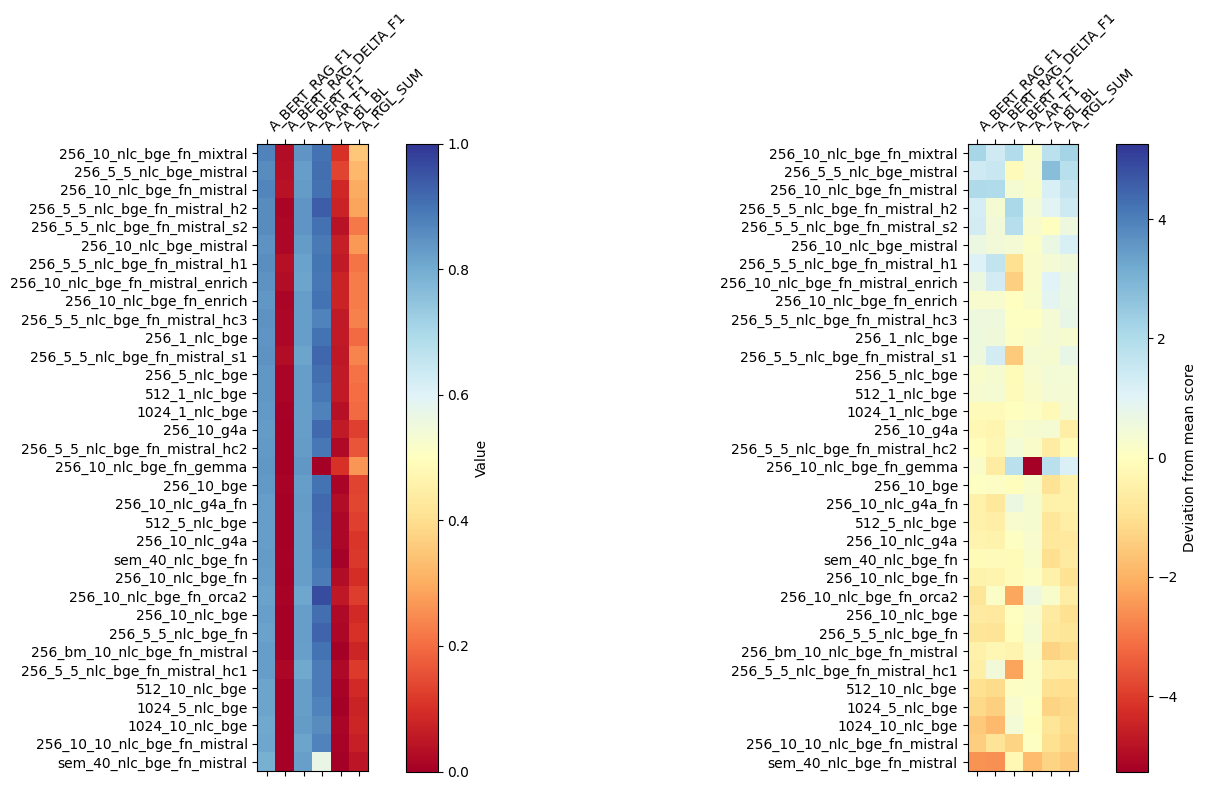

In [16]:
# Show a colored matrix
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

for ax, df, measure in zip(axes, [reduced_mean_results_df, imputed_reduced_mean_results_df_deviation], ['Value', 'Deviation from mean score']):
    cax = ax.matshow(df, cmap='RdYlBu')

    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(df.columns, rotation=45, ha='left')

    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels([config_name.replace('.yaml', '') for config_name in df.index])

    if measure == "Value":
        cax.set_clim(0, 1)
    else:
        cax.set_clim(
            -(max(df.max().max(), abs(df.min().min()))),
            max(df.max().max(), abs(df.min().min())))

    cbar = fig.colorbar(cax, ax=ax)
    cbar.set_label(measure)

fig.tight_layout()

plt.savefig(os.path.join(get_dir("images", RESULTS_NAME, create=True), "heatmap.png") if RESULTS_NAME else "heatmap.png")

In [17]:
config_styles = {
    name: {
        "color": f"C{i}"
    }
    for i, name in enumerate(sorted_config_names_deviation[::-1])
}

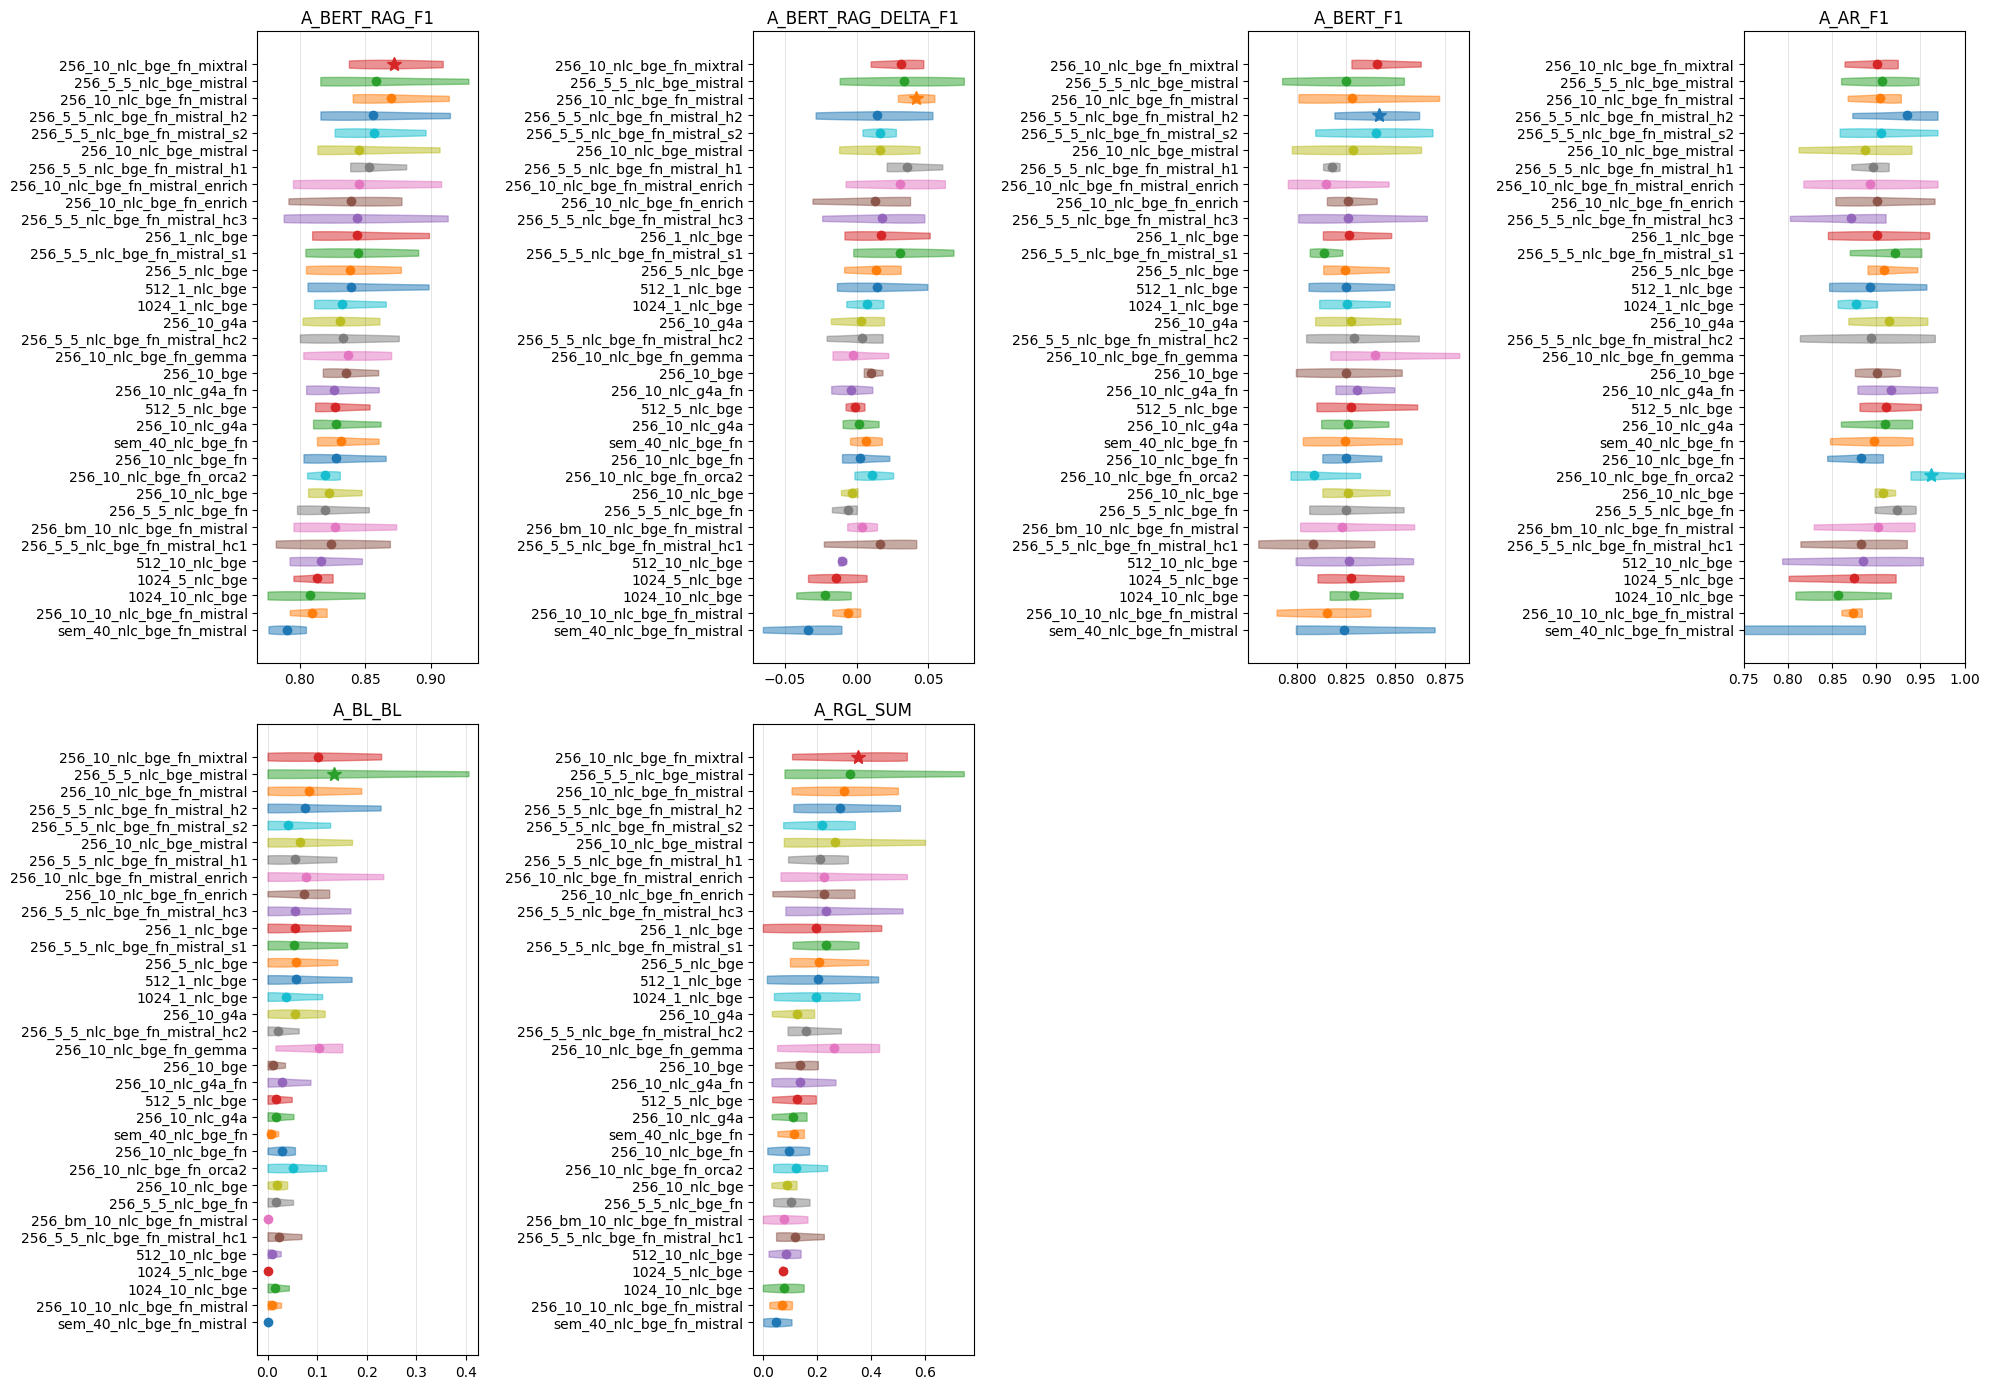

In [18]:
cols = 4
rows = np.ceil(len(reduced_mean_results_df.columns) / cols).astype(int)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 7 * rows))

# For each metric, draw a violin plot of the distribution with each violin representing a different configuration
for i, (metric, ax) in enumerate(zip(reduced_mean_results_df.columns, axes.flatten())):
    filtered_config_styles = {k: v for k, v in config_styles.items() if metric in config_results[k].columns}

    v = ax.violinplot([config_results[k][metric] for k in list(filtered_config_styles.keys())], vert=False)

    ax.set_yticks(range(1, len(filtered_config_styles) + 1))
    ax.set_yticklabels([name.replace('.yaml', '') for name in list(filtered_config_styles.keys())])

    # Set each violin to be a different color
    for j, (b, style) in enumerate(zip(v['bodies'], filtered_config_styles.values())):
        b.set_facecolor(style['color'])
        b.set_edgecolor(style['color'])
        b.set_alpha(0.5)

    for pc in [v['cbars'], v['cmins'], v['cmaxes']]:
        pc.set_edgecolor('none')

    max_mean_metric = max([config_results[name][metric].mean() for name in filtered_config_styles])

    # Show the mean value for each config
    for j, (name, style) in enumerate(filtered_config_styles.items()):
        if metric in config_results[name].columns:
            if config_results[name][metric].mean() == max_mean_metric:
                ax.plot(config_results[name][metric].mean(), j + 1, '*', color=style['color'], label=name.replace('.yaml', ''), markersize=10)
            else:
                ax.plot(config_results[name][metric].mean(), j + 1, 'o', color=style['color'])

    ax.set_title(metric)

    ax.grid(axis='x', color='k', alpha=0.1)

    if metric == 'A_AR_F1':
        ax.set_xlim(0.75, 1)

for ax in axes.flatten()[len(reduced_mean_results_df.columns):]:
    ax.axis('off')

fig.tight_layout()

plt.savefig(os.path.join(get_dir("images", RESULTS_NAME, create=True), "violin.png") if RESULTS_NAME else "violin.png")